In [45]:
# Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Este conjunto de datos contiene información detallada sobre la facturación de usuarios de energía eléctrica en Colombia, incluyendo consumo, tarifas, subsidios, mora y características de los medidores, para análisis y control del sector energético.

In [46]:
# Opciones gráficas
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10,6)

# =====================
# 1. Cargar dataset
# =====================
# Endpoint correcto con SoQL
url = "https://www.datos.gov.co/resource/gw2d-7n7y.csv?$limit=50000&$offset=0"
# Leer 50.000 registros
df = pd.read_csv(url)

display(df.head())
print(df.shape)

,niu,info_pred_util,car_t1743_tipo_usu_rc,tipo_fact,id_factura,fch_exped_factura,fch_ini_per_fact,fch_lectura_act,fch_lectura_ant,car_t1743_dias_facturados,...,val_rft_ene_react,car_t1743_ene_activa_import,car_t1743_ene_activa_export,car_t1743_veces,car_t1743_cons_recup,valor_cons_recuperado,identificador_empresa,are_esp_nombre,car_carg_ano,car_carg_periodo
0,138542426775061879138542426,INFORMACION PREDIAL DE CADA CATASTRO,6,INICIAL,714358624692914356714358624,2021-08-12T00:00:00.000,2021-06-26T00:00:00.000,2021-08-12T00:00:00.000,2021-06-25T00:00:00.000,31,...,0,NaN,0,1,0,0,564,EMPRESAS PÚBLICAS DE MEDELLIN E.S.P.,2021,8
1,423376811889954154423376811,INFORMACION PREDIAL DE CADA CATASTRO,6,INICIAL,66877855270133264668778552,2021-08-12T00:00:00.000,2021-06-26T00:00:00.000,2021-08-12T00:00:00.000,2021-06-25T00:00:00.000,31,...,0,NaN,0,0,0,0,564,EMPRESAS PÚBLICAS DE MEDELLIN E.S.P.,2021,8
2,653763171993299966653763171,NUMERO PREDIAL NACIONAL,6,INICIAL,7424364816824454274243648,2021-08-03T00:00:00.000,2021-06-12T00:00:00.000,2021-08-03T00:00:00.000,2021-06-11T00:00:00.000,32,...,0,NaN,0,0,0,0,564,EMPRESAS PÚBLICAS DE MEDELLIN E.S.P.,2021,8
3,123187244646920178123187244,USUARIO SIN CEDULA CATASTRAL ASOCIADA POR PART...,6,REFACTURACION DECISION ADMINISTRATIVA,508181191220372392508181191,2021-08-01T00:00:00.000,2021-08-01T00:00:00.000,2021-08-01T00:00:00.000,2021-08-01T00:00:00.000,31,...,0,NaN,0,0,0,0,564,EMPRESAS PÚBLICAS DE MEDELLIN E.S.P.,2021,8
4,124594318855020052124594318,USUARIO SIN CEDULA CATASTRAL ASOCIADA POR PART...,6,INICIAL,114064031277842885114064031,2021-08-20T00:00:00.000,2021-07-04T00:00:00.000,2021-08-20T00:00:00.000,2021-05-05T00:00:00.000,91,...,0,NaN,0,0,0,0,564,EMPRESAS PÚBLICAS DE MEDELLIN E.S.P.,2021,8


(50000, 67)


DESCRIPCIÓN DE LOS DATOS A UTILIZAR
car_t1743_cons_usuario → Consumo total de energía del usuario en el periodo facturado, medido en kWh.

car_t1743_dias_facturados → Número de días que cubre la factura del usuario (duración del periodo facturado).

car_t1743_cons_prom_sem → Consumo promedio semanal del usuario, calculado sobre el periodo facturado.

car_t1743_cons_subsist → Consumo de subsistencia del usuario, es decir, la cantidad de energía considerada mínima o básica para fines de subsidio.

car_t1743_nro_familias → Número de familias o usuarios beneficiarios de la factura (en caso de unidades agrupadas o múltiples hogares asociados).

val_total_fact → Valor total de la factura en pesos, incluyendo consumo, impuestos y otros cargos.

tarifa_apl → Tarifa aplicada al usuario para el consumo facturado, expresada en pesos por kWh.

car_t1743_tipo_usu_rc → Tipo de usuario según clasificación regulatoria o comercial (por ejemplo: residencial, comercial, industrial).

tipo_tarifa → Tipo de tarifa según el esquema aplicado (por ejemplo: normal, estrato subsidiado, estrato contributivo).

are_esp_nombre → Área de servicio de la empresa eléctrica a la que pertenece el usuario, como zona geográfica o sector de cobertura.

car_carg_ano → Año del periodo de facturación.

car_carg_periodo → Número de periodo de facturación dentro del año (por ejemplo, semestre o mes según el reporte).

In [49]:

# Diccionario: columna original → nombre más fácil
rename_dict = {
    "car_t1743_cons_usuario": "Consumo_usuario",
    "car_t1743_dias_facturados": "Dias_facturados",
    "car_t1743_cons_prom_sem": "Consumo_promedio_semestral",
    "car_t1743_cons_subsist": "Consumo_subsistencia",
    "car_t1743_nro_familias": "Numero_familias",
    "val_total_fact": "Valor_total_factura",
    "tarifa_apl": "Tarifa_aplicada",
    "car_t1743_tipo_usu_rc": "Tipo_usuario",
    "tipo_tarifa": "Tipo_tarifa",
    "are_esp_nombre": "Empresa_prestadora",
    "car_carg_ano": "Ano_carga",
    "car_carg_periodo": "Periodo_carga"
}
# Subset con variables clave para EDA
cols_interes = [
    "Consumo_usuario",
    "Dias_facturados",
    "Consumo_promedio_semestral",
    "Consumo_subsistencia",
    "Numero_familias",
    "Valor_total_factura",
    "Tarifa_aplicada",
    "Tipo_usuario",
    "Tipo_tarifa",
    "Empresa_prestadora",
    "Ano_carga",
    "Periodo_carga"
    ]
# Renombrar columnas
df = df.rename(columns=rename_dict)

# Verificar
display(df.head())
display(df.columns.tolist())

df = df[cols_interes]
display(df.head())
display(df.columns.tolist())

,niu,info_pred_util,Tipo_usuario,tipo_fact,id_factura,fch_exped_factura,fch_ini_per_fact,fch_lectura_act,fch_lectura_ant,Dias_facturados,...,val_rft_ene_react,car_t1743_ene_activa_import,car_t1743_ene_activa_export,car_t1743_veces,car_t1743_cons_recup,valor_cons_recuperado,identificador_empresa,Empresa_prestadora,Ano_carga,Periodo_carga
0,138542426775061879138542426,INFORMACION PREDIAL DE CADA CATASTRO,6,INICIAL,714358624692914356714358624,2021-08-12T00:00:00.000,2021-06-26T00:00:00.000,2021-08-12T00:00:00.000,2021-06-25T00:00:00.000,31,...,0,NaN,0,1,0,0,564,EMPRESAS PÚBLICAS DE MEDELLIN E.S.P.,2021,8
1,423376811889954154423376811,INFORMACION PREDIAL DE CADA CATASTRO,6,INICIAL,66877855270133264668778552,2021-08-12T00:00:00.000,2021-06-26T00:00:00.000,2021-08-12T00:00:00.000,2021-06-25T00:00:00.000,31,...,0,NaN,0,0,0,0,564,EMPRESAS PÚBLICAS DE MEDELLIN E.S.P.,2021,8
2,653763171993299966653763171,NUMERO PREDIAL NACIONAL,6,INICIAL,7424364816824454274243648,2021-08-03T00:00:00.000,2021-06-12T00:00:00.000,2021-08-03T00:00:00.000,2021-06-11T00:00:00.000,32,...,0,NaN,0,0,0,0,564,EMPRESAS PÚBLICAS DE MEDELLIN E.S.P.,2021,8
3,123187244646920178123187244,USUARIO SIN CEDULA CATASTRAL ASOCIADA POR PART...,6,REFACTURACION DECISION ADMINISTRATIVA,508181191220372392508181191,2021-08-01T00:00:00.000,2021-08-01T00:00:00.000,2021-08-01T00:00:00.000,2021-08-01T00:00:00.000,31,...,0,NaN,0,0,0,0,564,EMPRESAS PÚBLICAS DE MEDELLIN E.S.P.,2021,8
4,124594318855020052124594318,USUARIO SIN CEDULA CATASTRAL ASOCIADA POR PART...,6,INICIAL,114064031277842885114064031,2021-08-20T00:00:00.000,2021-07-04T00:00:00.000,2021-08-20T00:00:00.000,2021-05-05T00:00:00.000,91,...,0,NaN,0,0,0,0,564,EMPRESAS PÚBLICAS DE MEDELLIN E.S.P.,2021,8


['niu',
 'info_pred_util',
 'Tipo_usuario',
 'tipo_fact',
 'id_factura',
 'fch_exped_factura',
 'fch_ini_per_fact',
 'fch_lectura_act',
 'fch_lectura_ant',
 'Dias_facturados',
 'Tipo_tarifa',
 'tipo_lectura',
 'Consumo_usuario',
 'car_t1743_cons_cdc',
 'Consumo_promedio_semestral',
 'Consumo_subsistencia',
 'val_fact_cu',
 'val_fact_cdc',
 'car_t1743_rft_cu',
 'car_t1743_rft_cdc',
 'val_rft_cu',
 'val_rft_cons_cdc',
 'Numero_familias',
 'val_subs_usu',
 'val_rft_subs_usu',
 'car_t1743_nro_fact_foes',
 'val_foes_apl_cu',
 'val_foes_apl_cdc',
 'val_rft_foes_apl_cu',
 'val_rft_foes_apl_cdc',
 'val_contrib',
 'rft_val_contrib',
 'car_t1743_dias_mora',
 'val_interes_mora',
 'val_interes_mora_cnr',
 'val_cartera_cons',
 'val_cartera_contrib',
 'car_t1743_tvc',
 'vc',
 'vcd',
 'vcf',
 'car_t1743_cec',
 'conpu',
 'car_t1743_thc',
 'car_t1743_hc',
 'rft_compensa',
 'tipo_medidor',
 'car_t1743_cod_medidor',
 'Valor_total_factura',
 'Tarifa_aplicada',
 'fch_publ_tarifa_apl',
 'fch_reg_contable',


,Consumo_usuario,Dias_facturados,Consumo_promedio_semestral,Consumo_subsistencia,Numero_familias,Valor_total_factura,Tarifa_aplicada,Tipo_usuario,Tipo_tarifa,Empresa_prestadora,Ano_carga,Periodo_carga
0,24,31,63,2,0,6772,296.99,6,REGULADA,EMPRESAS PÚBLICAS DE MEDELLIN E.S.P.,2021,8
1,71,31,81,2,0,20961,296.99,6,REGULADA,EMPRESAS PÚBLICAS DE MEDELLIN E.S.P.,2021,8
2,16,32,18,5,0,10415,650.94,6,REGULADA,EMPRESAS PÚBLICAS DE MEDELLIN E.S.P.,2021,8
3,0,31,82,1,0,0,0.00,6,REGULADA,EMPRESAS PÚBLICAS DE MEDELLIN E.S.P.,2021,8
4,143,91,45,2,0,42217,296.99,6,REGULADA,EMPRESAS PÚBLICAS DE MEDELLIN E.S.P.,2021,8


['Consumo_usuario',
 'Dias_facturados',
 'Consumo_promedio_semestral',
 'Consumo_subsistencia',
 'Numero_familias',
 'Valor_total_factura',
 'Tarifa_aplicada',
 'Tipo_usuario',
 'Tipo_tarifa',
 'Empresa_prestadora',
 'Ano_carga',
 'Periodo_carga']

Elegimos solamente las columnas que nos interesa ver sus relaciones , además revisamos si tienen valores Nulos

In [50]:
df[cols_interes].isnull().sum()
# Eliminar valores nulos en consumo
df = df[df["Consumo_usuario"].notnull()]


In [52]:
# Valores únicos y conteo
# Para tipo_tarifa
print("Valores únicos de tipo_tarifa:")
print(df["Tipo_tarifa"].unique())
print("\nConteo de tipo_tarifa:")
print(df["Tipo_tarifa"].value_counts())

# Para Tipo_usuario

print("\nValores únicos de Tipo_usuario:")
print(df["Tipo_usuario"].unique())
print("\nConteo de Tipo_usuario:")
print(df["Tipo_usuario"].value_counts())

Valores únicos de tipo_tarifa:
['REGULADA']

Conteo de tipo_tarifa:
Tipo_tarifa
REGULADA    50000
Name: count, dtype: int64

Valores únicos de Tipo_usuario:
[6 1]

Conteo de Tipo_usuario:
Tipo_usuario
6    49982
1       18
Name: count, dtype: int64


EXPLORACIÓN EDA

**Hallazgo: El consumo de energía por tipo de usuario se concentra sobre todo en valores bajos de energía KWh [0-10000],donde el tipo 1 demostro tener unos pocos valores muy altos**

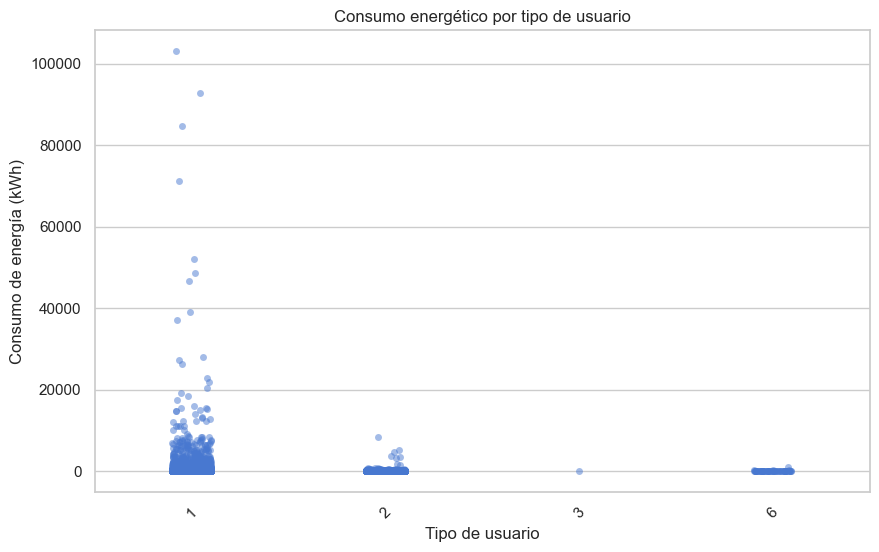

In [19]:
sns.stripplot(data=df, x='car_t1743_tipo_usu_rc', y='car_t1743_cons_usuario', 
              jitter=True, alpha=0.5)

plt.title('Consumo energético por tipo de usuario')
plt.xlabel('Tipo de usuario')
plt.ylabel('Consumo de energía (kWh)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
**Hallazgo: Se realizó el promedio por tipo de usuario y se encontro que en todos los tipos de usuarios es menor a 220 kWh**

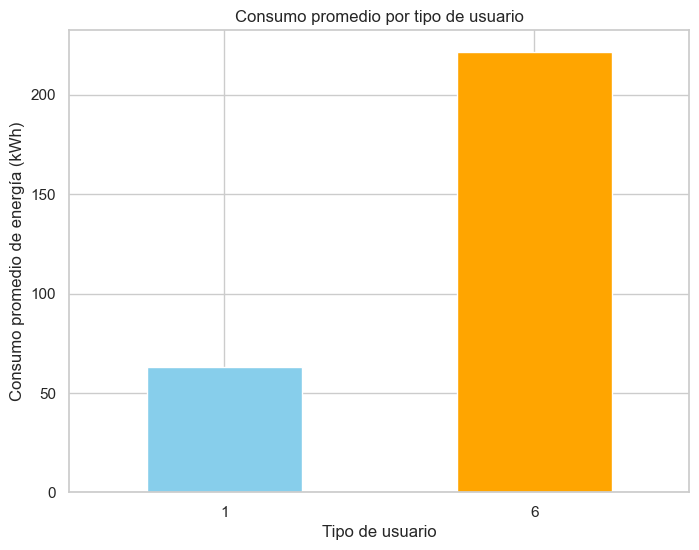

Tipo_usuario
1     63.166667
6    221.388220
Name: Consumo_usuario, dtype: float64


In [53]:
# Consumo promedio por tipo de usuario
consumo_por_tipo = df.groupby("Tipo_usuario")["Consumo_usuario"].mean()

plt.figure(figsize=(8,6))
consumo_por_tipo.plot(kind="bar", color=["skyblue", "orange", "green"])
plt.title("Consumo promedio por tipo de usuario")
plt.xlabel("Tipo de usuario")
plt.ylabel("Consumo promedio de energía (kWh)")
plt.xticks(rotation=0)
plt.show()

print(consumo_por_tipo)

In [ ]:
**Hallazgo: Como se observa el 50% de los datos están entre 80 y 200 KWh**
**Las medianas se matienen alrededor de 110 y  KWh en los tipos de usuario 6 **
**Se observa algunos outliers bien extremos que pueden corresponder a residencias que las catalogaron mal o errores de medición**

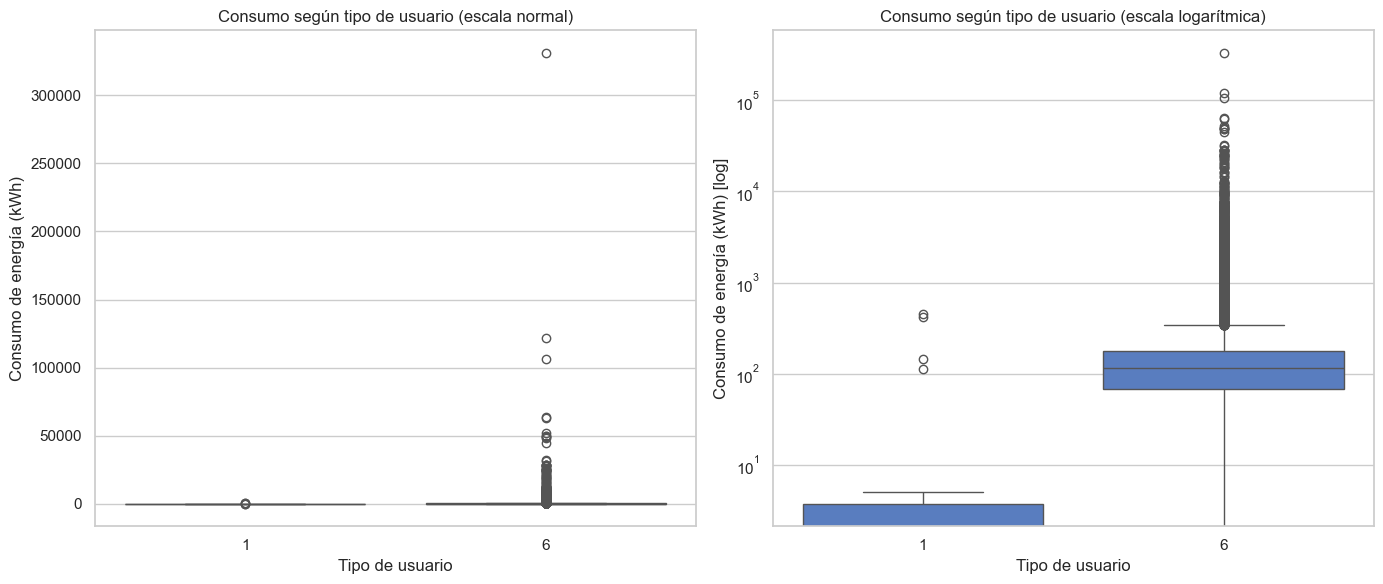

In [54]:
# 5. Boxplots por variables categóricas
fig, axes = plt.subplots(1, 2, figsize=(14,6))
# Versión normal
sns.boxplot(data=df, x="Tipo_usuario", y="Consumo_usuario", ax=axes[0])
axes[0].set_title("Consumo según tipo de usuario (escala normal)")
axes[0].set_xlabel("Tipo de usuario")
axes[0].set_ylabel("Consumo de energía (kWh)")

# Versión logarítmica
sns.boxplot(data=df, x="Tipo_usuario", y="Consumo_usuario", ax=axes[1])
axes[1].set_yscale("log")
axes[1].set_title("Consumo según tipo de usuario (escala logarítmica)")
axes[1].set_xlabel("Tipo de usuario")
axes[1].set_ylabel("Consumo de energía (kWh) [log]")

plt.tight_layout()
plt.show()


In [ ]:
**Hay alta correlación entre consumo promedio semestral , tarifa aplicada, consumo de subsistencia.**
**El objetivo o target es car_t1743_cons_usuario (consumo de energía).

Predictoras fuertes: Consumo_promedio_semestral, Tarifa_aplicada, Consumo_subsistencia.

Predictoras secundarias: Dias_facturados, tipo_Usuario

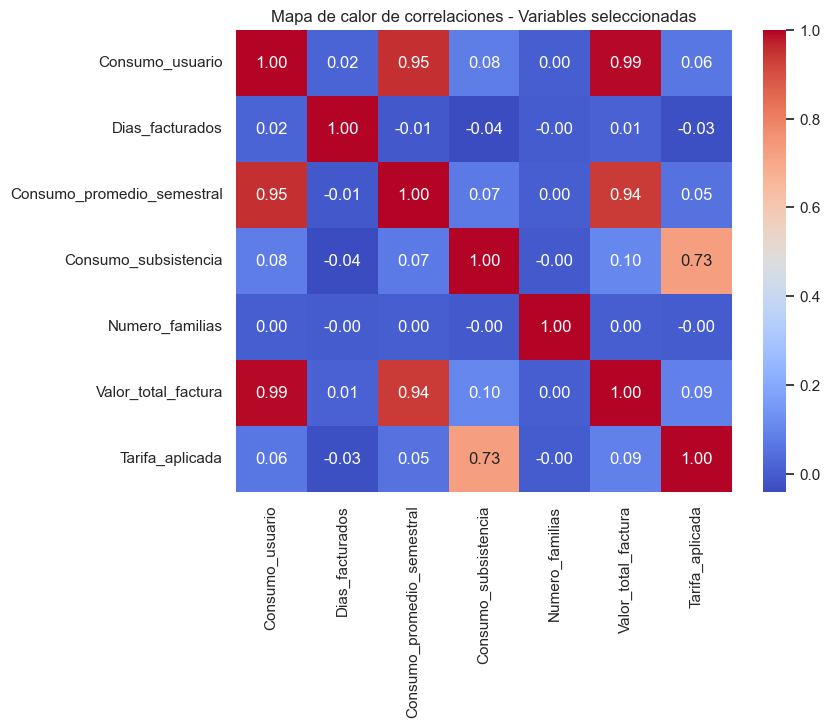

In [63]:
num_vars_interes = [
    "Consumo_usuario", 
    "Dias_facturados", 
    "Consumo_promedio_semestral", 
    "Consumo_subsistencia",
    "Numero_familias", 
    "Valor_total_factura",
    "Tarifa_aplicada"
]

# Crear un subset con esas columnas
df_num = df[num_vars_interes]

# Calcular correlación
corr = df_num.corr()

# Graficar
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones - Variables seleccionadas")
plt.show()